In [1]:
!pip install torch

     -------------------------------------- 167.2/167.2 MB 3.4 MB/s eta 0:00:00


In [2]:
!pip install torchaudio

     ---------------------------------------- 2.1/2.1 MB 3.2 MB/s eta 0:00:00


In [3]:
!pip install librosa 

In [17]:
import torch
import torchaudio
import librosa
from torchaudio import transforms
import matplotlib.pyplot as plt 
import random 
import numpy as np 

In [9]:
file = librosa.ex('trumpet')
audio,sr = torchaudio.load(file)
sample=(audio,sr)
def tfm_spectro(ad, sr=16000, to_db_scale=False, n_fft=1024, 
                ws=None, hop=None, f_min=0.0, f_max=-80, pad=0, n_mels=128):
    # We must reshape signal for torchaudio to generate the spectrogram.
    mel = transforms.MelSpectrogram(sample_rate=ad[1], n_mels=n_mels, n_fft=n_fft, hop_length=hop, 
                                    f_min=f_min, f_max=f_max, pad=pad,)(ad[0].reshape(1, -1))
    mel = mel.permute(0,2,1) # swap dimension, mostly to look sane to a human.
    if to_db_scale: mel = transforms.AmplitudeToDB(stype='magnitude', top_db=f_max)(mel)
    return mel

spectro = tfm_spectro(sample, ws=512, hop=256, n_mels=128, to_db_scale=True, f_max=8000, f_min=-80)

c:\Users\ssshu\anaconda3\envs\tf_gpu\lib\site-packages\torchaudio\functional\functional.py:571: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  warnings.warn(


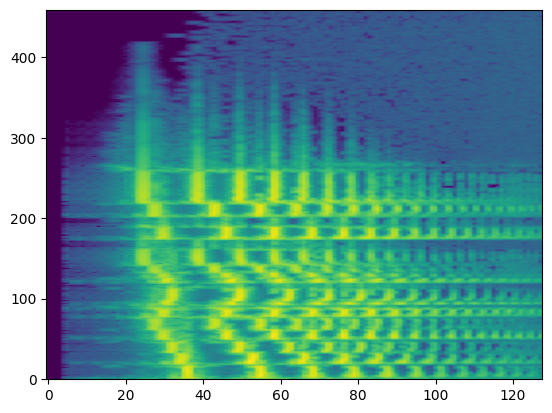

torch.Size([1, 460, 128])

In [14]:
def tensor_to_img(spectrogram): 
    plt.imshow(spectrogram[0],aspect='auto', origin='lower')
    plt.show();
    display(spectrogram.shape)
tensor_to_img(spectro)

In [15]:
def freq_mask(spec, F=250, num_masks=1):
    test = spec.clone()
    num_mel_channels = test.shape[1]
    for i in range(0, num_masks):        
        freq = random.randrange(0, F)
        zero = random.randrange(0, num_mel_channels - freq)
        # avoids randrange error if values are equal and range is empty
        if (zero == zero + freq): return test
        mask_end = random.randrange(zero, zero + freq) 
        test[0][zero:mask_end] = test.mean()
    return test

Original


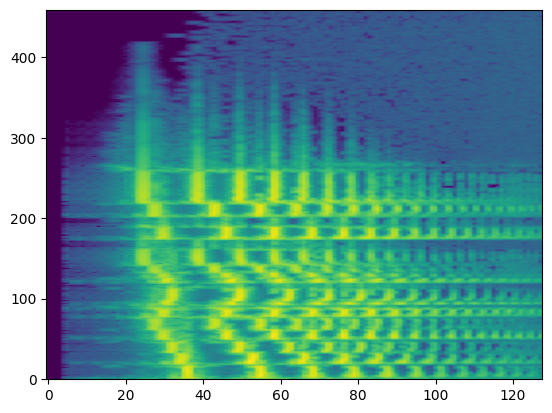

torch.Size([1, 460, 128])

5 masks


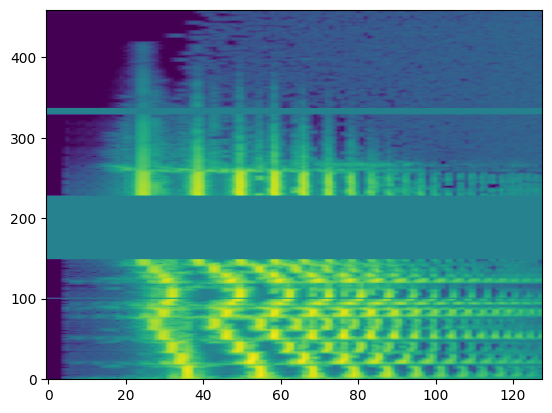

torch.Size([1, 460, 128])

In [18]:
def test_freq_mask():
    print('Original')
    tensor_to_img(spectro)
    print('5 masks')
    tensor_to_img(freq_mask(spectro, num_masks=5))
test_freq_mask()